In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')
from fbprophet import Prophet

In [ ]:
!pip install pystan~=2.14
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 67.3 MB 135 kB/s 
  Attempting uninstall: pystan
    Found existing installation: pystan 3.3.0
    Uninstalling pystan-3.3.0:
      Successfully uninstalled pystan-3.3.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 1.4 MB/s 
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=6638312 sha256=bdff91221c77342afe0948458d7e2b5c4763333f3d7a1cf56e19a06e4d383c4f
  Stored in directory: /root/.cache/pip/wheels/cd/a1/12/db63ff624de492fe6cccf676091a0860fdde2ffde4bc3280e2
Successfully built fbprophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 1.0.8
    Uninstalling cmdstanpy-1.0.8:
      Successfully uninstalled cmdstanpy-1.0.8
ERROR: pip's dependency resolver does not currently take into account all the 

In [ ]:
dfx = pd.read_csv('covid_19_complete.csv')
dfx

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0,0,0,Africa
...,...,...,...,...,...,...,...,...,...,...
49063,NaN,Sao Tome and Principe,0.186400,6.613100,2020-07-27,865,14,734,117,Africa
49064,NaN,Yemen,15.552727,48.516388,2020-07-27,1691,483,833,375,Eastern Mediterranean
49065,NaN,Comoros,-11.645500,43.333300,2020-07-27,354,7,328,19,Africa
49066,NaN,Tajikistan,38.861000,71.276100,2020-07-27,7235,60,6028,1147,Europe


In [ ]:
df = dfx[dfx['Country/Region'] == 'India']

In [ ]:
df['year'] = pd.DatetimeIndex(df['Date']).year
df['month'] = pd.DatetimeIndex(df['Date']).month
df['day'] = pd.DatetimeIndex(df['Date']).day

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 188 entries, 129 to 48936
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  0 non-null      object 
 1   Country/Region  188 non-null    object 
 2   Lat             188 non-null    float64
 3   Long            188 non-null    float64
 4   Date            188 non-null    object 
 5   Confirmed       188 non-null    int64  
 6   Deaths          188 non-null    int64  
 7   Recovered       188 non-null    int64  
 8   Active          188 non-null    int64  
 9   WHO Region      188 non-null    object 
 10  year            188 non-null    int64  
 11  month           188 non-null    int64  
 12  day             188 non-null    int64  
dtypes: float64(2), int64(7), object(4)
memory usage: 20.6+ KB


In [ ]:
df

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region,year,month,day
129,NaN,India,20.593684,78.96288,2020-01-22,0,0,0,0,South-East Asia,2020,1,22
390,NaN,India,20.593684,78.96288,2020-01-23,0,0,0,0,South-East Asia,2020,1,23
651,NaN,India,20.593684,78.96288,2020-01-24,0,0,0,0,South-East Asia,2020,1,24
912,NaN,India,20.593684,78.96288,2020-01-25,0,0,0,0,South-East Asia,2020,1,25
1173,NaN,India,20.593684,78.96288,2020-01-26,0,0,0,0,South-East Asia,2020,1,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...
47892,NaN,India,20.593684,78.96288,2020-07-23,1288108,30601,817209,440298,South-East Asia,2020,7,23
48153,NaN,India,20.593684,78.96288,2020-07-24,1337024,31358,849432,456234,South-East Asia,2020,7,24
48414,NaN,India,20.593684,78.96288,2020-07-25,1385635,32060,885573,468002,South-East Asia,2020,7,25
48675,NaN,India,20.593684,78.96288,2020-07-26,1435616,32771,917568,485277,South-East Asia,2020,7,26


In [ ]:
df.drop(['Province/State'], axis = 1, inplace=True)

In [ ]:
df.isnull().sum()

Country/Region    0
Lat               0
Long              0
Date              0
Confirmed         0
Deaths            0
Recovered         0
Active            0
WHO Region        0
year              0
month             0
day               0
dtype: int64

In [ ]:
dfn = df.groupby('Date')[['Confirmed', 'Deaths', 'Recovered', 'Active']].sum()

In [ ]:
dfn.head(20)

,Confirmed,Deaths,Recovered,Active
Date,,,,
2020-01-22,0,0,0,0
2020-01-23,0,0,0,0
2020-01-24,0,0,0,0
2020-01-25,0,0,0,0
2020-01-26,0,0,0,0
2020-01-27,0,0,0,0
2020-01-28,0,0,0,0
2020-01-29,0,0,0,0
2020-01-30,1,0,0,1


In [ ]:
model = Prophet()
model.add_seasonality(name = 'Monthly', period = 30.42, fourier_order = 4)

In [ ]:
main = df.reset_index()
confirmed_df = main[['Date', 'Confirmed']]

In [ ]:
cols = confirmed_df.columns
confirmed_df = confirmed_df.rename(columns = {cols[0] : 'ds', cols[1] : 'y'})

In [ ]:
div = round((70/100)*confirmed_df.shape[0])
train = confirmed_df.iloc[:div]
test = confirmed_df.iloc[div:]
print(div)
print(train.shape)
print(test.shape)

132
(132, 2)
(56, 2)


In [ ]:
model.fit(train)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
pred_dates = model.make_future_dataframe(periods = 40)

In [ ]:
preds = model.predict(pred_dates)

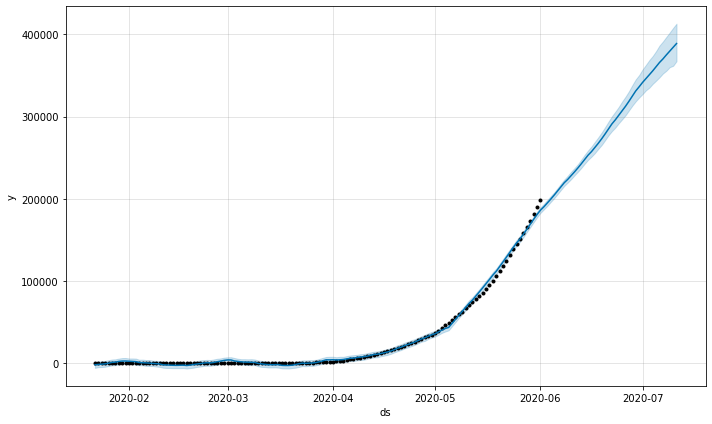

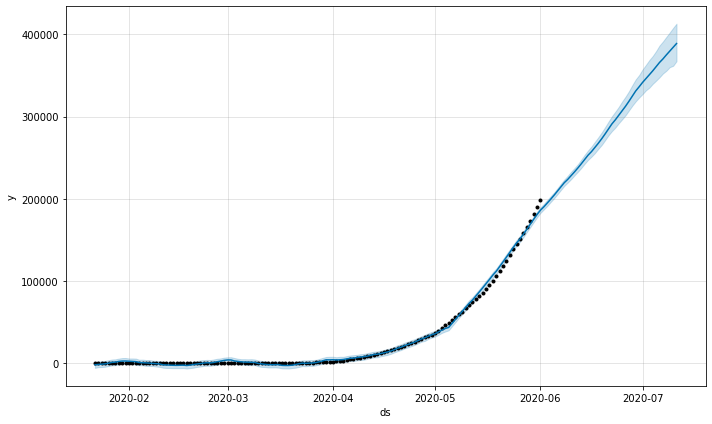

In [ ]:
model.plot(preds)

In [ ]:
rmse = np.sqrt(mean_squared_error(train['y'], preds['yhat'].iloc[:div]))
print(rmse)

2758.493306881921


In [ ]:
X

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

main = dfn.reset_index()
confirmed_df = main[['Date', 'Confirmed']]
deaths_df = main[['Date', 'Deaths']]
recovered_df = main[['Date', 'Recovered']]
active_df = main[['Date', 'Active']]

X = confirmed_df[['Date']]

In [ ]:
Y = d.values
Y.shape

(188, 1)

In [ ]:
Y

array([[     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     1],
       [     1],
       [     1],
       [     2],
       [     3],
       [     3],
       [     3],
       [     3],
       [     3],
       [     3],
       [     3],
       [     3],
       [     3],
       [     3],
       [     3],
       [     3],
       [     3],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     0],
       [     2],
       [     2],
       [    25],
       [    27],
       [    28],
       [    31],
       [    36],
       [    40],
       [    52],
       [    57],
       [    68],
       [    76],
       [    96],
       [    98],
       [   104],
       [   125],
       [   139],
       [   175],
       [   219

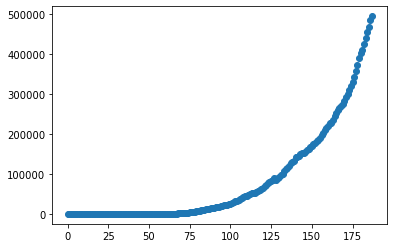

In [ ]:
plt.scatter(X, Y)
plt.show()

In [ ]:
X = X.reshape(-1, 1)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [ ]:
lin_model = LinearRegression()
lin_model.fit(X, Y)

LinearRegression()

In [ ]:
Y_predict = lin_model.predict(X)

In [ ]:
rmse = (np.sqrt(mean_squared_error(Y, Y_predict)))
print(rmse)

66542.34438960296


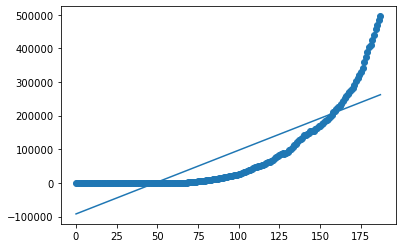

In [ ]:
plt.scatter(X, Y)
plt.plot(X, Y_predict)
plt.show()